Text(0.5, 1.0, 'Blob Detection at Various Sigma Values')

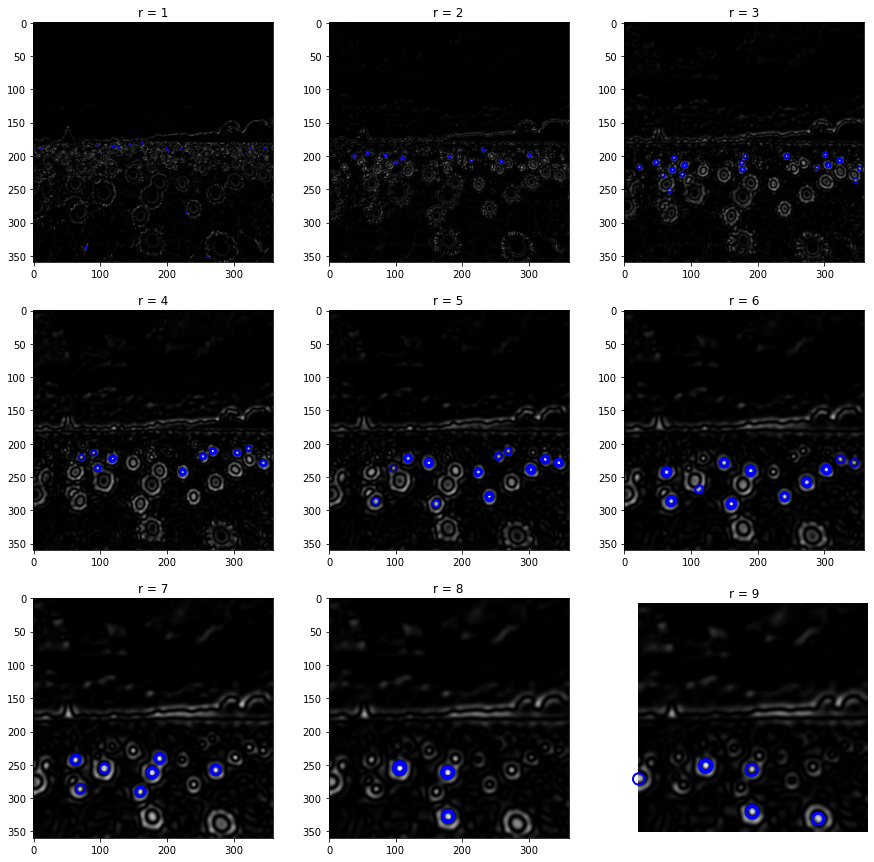

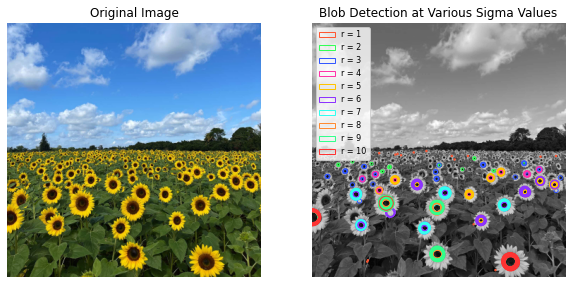

In [54]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max

# Function to generate the Laplacian of Gaussian kernel
def laplacian_of_gaussian_kernel(sigma):
    half_width = round(3 * sigma)  # Half width of the kernel
    X, Y = np.meshgrid(np.arange(-half_width, half_width + 1, 1), np.arange(-half_width, half_width + 1, 1))

    log_kernel = ((X**2 + Y**2) / (2 * sigma**2) - 1) * np.exp(-(X**2 + Y**2) / (2 * sigma**2)) / (np.pi * sigma**4)
    return log_kernel

# Function to identify local maxima in the LoG-convolved image
def find_local_maxima(log_image):
    coordinates = []
    (height, width) = log_image.shape
    kernel_radius = 1
    for i in range(kernel_radius, height - kernel_radius):
        for j in range(kernel_radius, width - kernel_radius):
            img_patch = log_image[i - kernel_radius:i + kernel_radius + 1, j - kernel_radius:j + kernel_radius + 1]
            local_max = np.max(img_patch)  # Identify maximum value
            if local_max >= 0.09:  # Threshold value
                x, y = np.unravel_index(img_patch.argmax(), img_patch.shape)
                coordinates.append((i + x - kernel_radius, j + y - kernel_radius))  # Calculate coordinates
    return set(coordinates)

# Read and preprocess the image
image = cv.imread('Resources/the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY) / 255

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Applying the Laplacian of Gaussian for different sigma values
for r, ax in enumerate(axes.flatten(), start=1):
    sigma_value = r / 1.414
    log_filter = sigma_value**2 * laplacian_of_gaussian_kernel(sigma_value)
    convolved_image = np.square(cv.filter2D(image_gray, -1, log_filter))

    # Find local maxima
    maxima_coords = find_local_maxima(convolved_image)

    # Display the result
    ax.imshow(convolved_image, cmap='gray')
    ax.set_title(f'r = {r}')

    # Mark detected blobs
    for x, y in maxima_coords:
        circle = plt.Circle((y, x), sigma_value * 1.414, color='blue', linewidth=1, fill=False)
        ax.add_patch(circle)
    ax.plot()

plt.axis('off')

# Re-reading and processing the image for side-by-side comparison
image_color = cv.imread('Resources/the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)
image_gray = cv.cvtColor(image_color, cv.COLOR_BGR2GRAY) / 255

fig, axes = plt.subplots(1, 2, figsize=(10, 10))

axes[0].imshow(cv.cvtColor(image_color, cv.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis('off')

ax = axes[1]
ax.imshow(image_gray, cmap='gray')
ax.grid(False)

# Custom color palette
custom_colors = [
    '#FF5733',  # Red-Orange
    '#33FF57',  # Lime Green
    '#3357FF',  # Bright Blue
    '#FF33A8',  # Magenta
    '#FFC300',  # Golden Yellow
    '#8D33FF',  # Purple
    '#33FFF0',  # Aqua
    '#FF8C33',  # Orange
    '#33FF8C',  # Mint Green
    '#FF3333'   # Bright Red
]

patch_list = []
label_list = []

# Detecting blobs for multiple sigma values and marking them
for r in range(1, 11):
    sigma_value = r / 1.414
    log_filter = sigma_value**2 * laplacian_of_gaussian_kernel(sigma_value)
    convolved_image = np.square(cv.filter2D(image_gray, -1, log_filter))

    # Find local maxima
    maxima_coords = find_local_maxima(convolved_image)

    # Mark detected blobs with circles
    for x, y in maxima_coords:
        circle = plt.Circle((y, x), sigma_value * 1.414, color=custom_colors[r - 1], linewidth=1, fill=False)
        ax.add_patch(circle)

    patch_list.append(circle)
    label_list.append(f'r = {r}')
    ax.plot()

ax.set_xlim(0, image_color.shape[1])

# Hide axis and add legend
plt.axis('off')
ax.legend(patch_list, label_list, loc='best', fontsize=8)
ax.set_title("Blob Detection at Various Sigma Values")